In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Tensorflow with GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/FinalDataNext.csv")
print(data.shape)

(24436, 4802)


In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
x = data.iloc[:,0:-2]
y_age = data.iloc[:,-1]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_age)
encoded_Y = encoder.transform(y_age)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,dummy_y,test_size = 0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Activation, Dropout, BatchNormalization,Input
from keras import backend as K 

age_model = Sequential()
dim = x_train.shape[1]
#Layer 1
age_model.add(Dense(64,activation = 'relu',input_dim = dim))
age_model.add(Dropout(0.5))
#Layer 2
age_model.add(Dense(32,activation = 'relu',input_dim = dim))
age_model.add(Dropout(0.5))
#Layer 3
age_model.add(Dense(16,activation = 'relu',input_dim = dim))
age_model.add(Dropout(0.5))
#output layer
age_model.add(Dense(7,activation = 'softmax'))
age_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
age_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                307264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)  

In [0]:
#Fit/Train the model
bsize = 50  
ans = age_model.fit(x_train, y_train, batch_size = bsize, epochs = 500 ,validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 17105 samples, validate on 7331 samples
Epoch 1/500
17105/17105 [==============================] - 9s 546us/step - loss: 2.0803 - acc: 0.4170 - val_loss: 1.5509 - val_acc: 0.5113
Epoch 2/500
17105/17105 [==============================] - 8s 485us/step - loss: 1.5496 - acc: 0.5100 - val_loss: 1.4236 - val_acc: 0.5113
Epoch 3/500
17105/17105 [==============================] - 8s 488us/step - loss: 1.4527 - acc: 0.5182 - val_loss: 1.3898 - val_acc: 0.5113
Epoch 4/500
17105/17105 [==============================] - 8s 491us/step - loss: 1.4070 - acc: 0.5197 - val_loss: 1.3733 - val_acc: 0.5113
Epoch 5/500
17105/17105 [==============================] - 8s 488us/step - loss: 1.3841 - acc: 0.5198 - val_loss: 1.3594 - val_acc: 0.5113
Epoch 6/500
17105/17105 [==============================] - 8s 487us/step - loss: 1.3726 - acc: 0.5197 - val_loss: 1.3621 - val_acc: 0.5113
Epoch 7/500
17105/17105 [==============================] - 8s 481us/s

In [0]:
scores = age_model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (age_model.metrics_names[1], scores[1]*100))

7331/7331 [==============================] - 1s 138us/step

acc: 58.85%


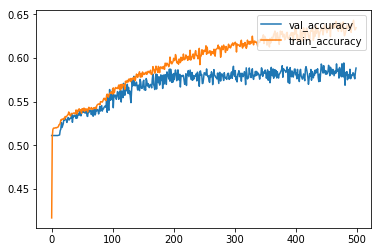

In [0]:
accuracy_val = []
for i in ans.history['val_acc']:
  accuracy_val.append(i)
accuracy_train = []
for i in ans.history['acc']:
  accuracy_train.append(i)
import matplotlib.pyplot as plt
plt.plot(accuracy_val, label='val_accuracy')
plt.plot(accuracy_train, label='train_accuracy')
plt.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Age Accuracy.png',bbox_inches='tight')
plt.show()

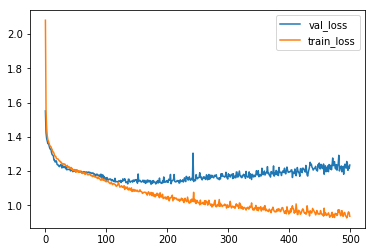

In [0]:
loss_val = []
for i in ans.history['val_loss']:
  loss_val.append(i)
loss_train = []
for i in ans.history['loss']:
  loss_train.append(i)
plt.plot(loss_val, label='val_loss')
plt.plot(loss_train, label='train_loss')
plt.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Age Loss.png',bbox_inches='tight')
plt.show()


# **Testing the model on a group image**

In [0]:
from google.colab.patches import cv2_imshow
import cv2

## **Test Image 1**

1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


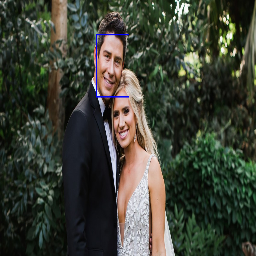


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


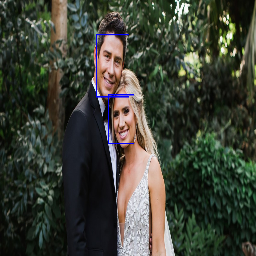

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = age_model.predict(face_img)
  labels = [1,5,10,16,28,51,75]
  for i in range(len(x[0])):
    print(labels[i],end=":")
    print(format(x[0][i]*100,'.2f'),end = "")
    print("%")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)
  print()

## Test image 2

1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:97.49%
51:2.51%
75:0.00%


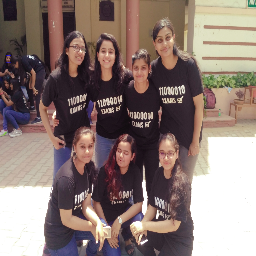


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:98.96%
51:1.04%
75:0.00%


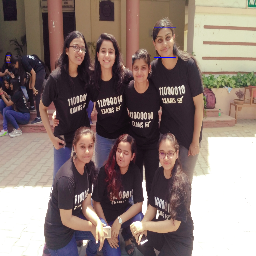


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.99%
51:0.01%
75:0.00%


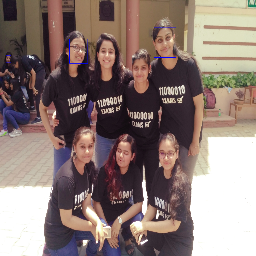


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.90%
51:0.10%
75:0.00%


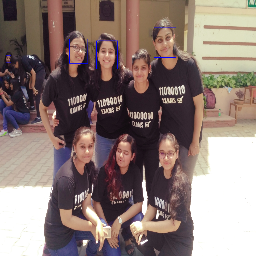


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:97.15%
51:2.85%
75:0.00%


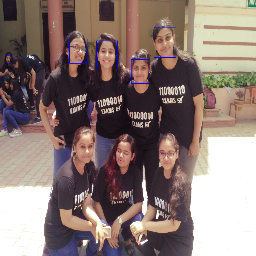


1:0.00%
5:0.00%
10:0.00%
16:0.18%
28:80.66%
51:19.16%
75:0.00%


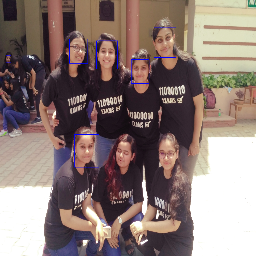


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.47%
51:0.53%
75:0.00%


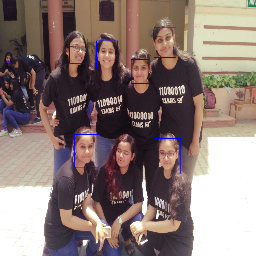


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.99%
51:0.01%
75:0.00%


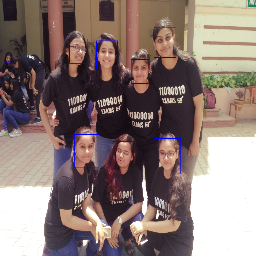

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test2.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = age_model.predict(face_img)
  labels = [1,5,10,16,28,51,75]
  for i in range(len(x[0])):
    print(labels[i],end=":")
    print(format(x[0][i]*100,'.2f'),end = "")
    print("%")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)
  print()

## Test image 3

1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:98.94%
51:1.06%
75:0.00%


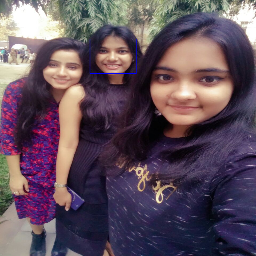


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:92.90%
51:7.10%
75:0.00%


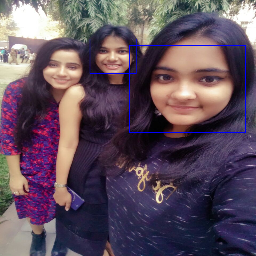


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.93%
51:0.07%
75:0.00%


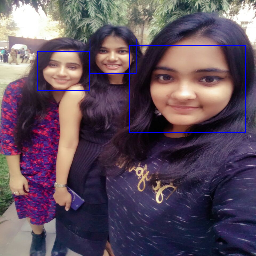

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test3.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = age_model.predict(face_img)
  labels = [1,5,10,16,28,51,75]
  for i in range(len(x[0])):
    print(labels[i],end=":")
    print(format(x[0][i]*100,'.2f'),end = "")
    print("%")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)
  print()

## Test image 4

1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:97.11%
51:2.89%
75:0.00%


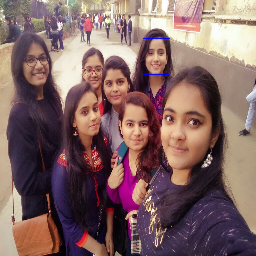


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.94%
51:0.06%
75:0.00%


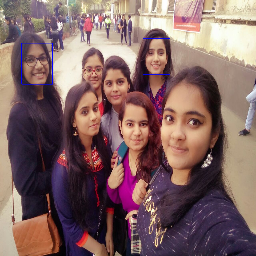


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


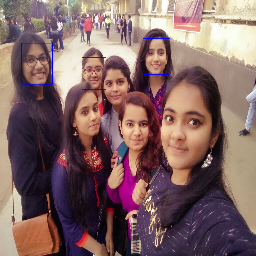


1:0.00%
5:0.00%
10:0.00%
16:0.01%
28:84.06%
51:15.93%
75:0.00%


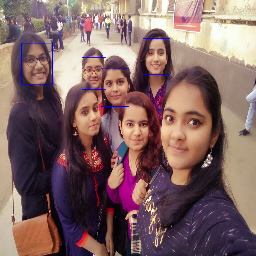


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.53%
51:0.47%
75:0.00%


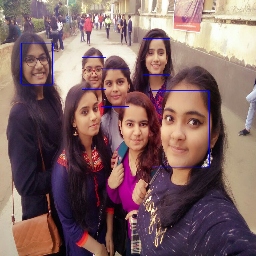


1:0.00%
5:0.00%
10:0.00%
16:2.27%
28:74.87%
51:22.85%
75:0.01%


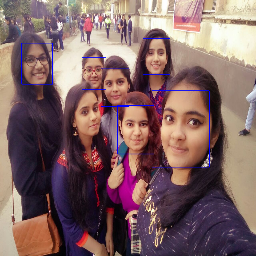


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:94.57%
51:5.43%
75:0.00%


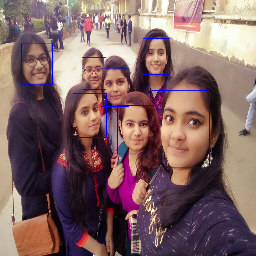

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test4.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = age_model.predict(face_img)
  labels = [1,5,10,16,28,51,75]
  for i in range(len(x[0])):
    print(labels[i],end=":")
    print(format(x[0][i]*100,'.2f'),end = "")
    print("%")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)
  print()

## Test image 5


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.99%
51:0.01%
75:0.00%


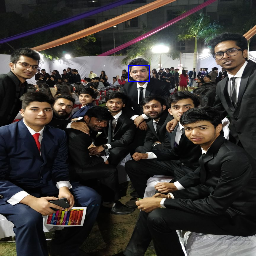


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


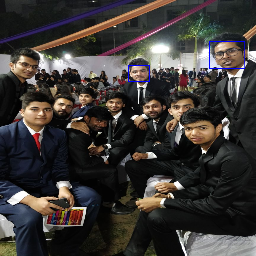


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:93.95%
51:6.05%
75:0.00%


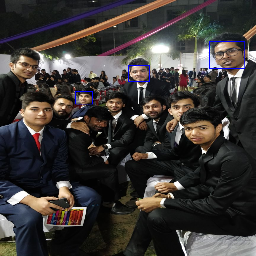


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.11%
51:0.89%
75:0.00%


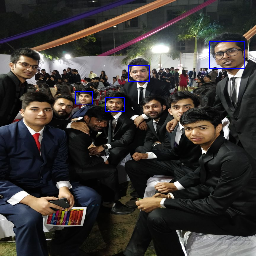


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


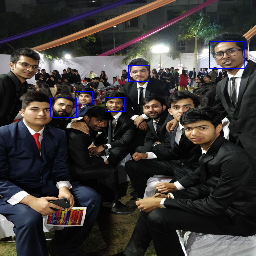


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:100.00%
51:0.00%
75:0.00%


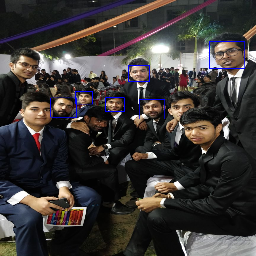


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:94.44%
51:5.56%
75:0.00%


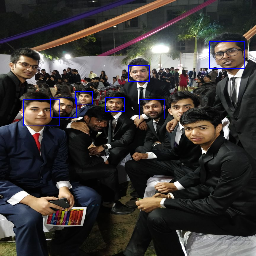


1:0.00%
5:0.00%
10:0.00%
16:0.00%
28:99.98%
51:0.02%
75:0.00%


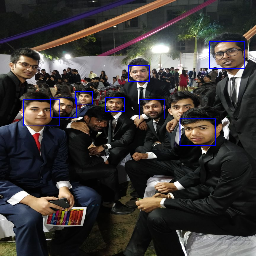

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test5.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = age_model.predict(face_img)
  labels = [1,5,10,16,28,51,75]
  for i in range(len(x[0])):
    print(labels[i],end=":")
    print(format(x[0][i]*100,'.2f'),end = "")
    print("%")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)
  print()